In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [101]:
import sklearn

print(sklearn.__version__)


1.3.2


In [102]:
# Load in your data here
data = pd.read_csv("AEIdepressivevsbipolar_allPSDFC.csv") #file name here


<Axes: >

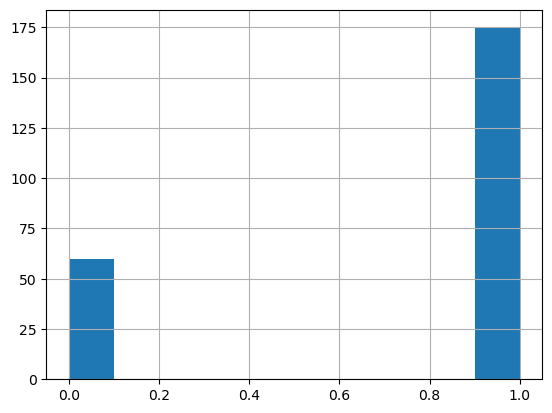

In [103]:
# Data preprocessing
X = data.drop('Class', axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=None)
y_train.hist()

<Axes: >

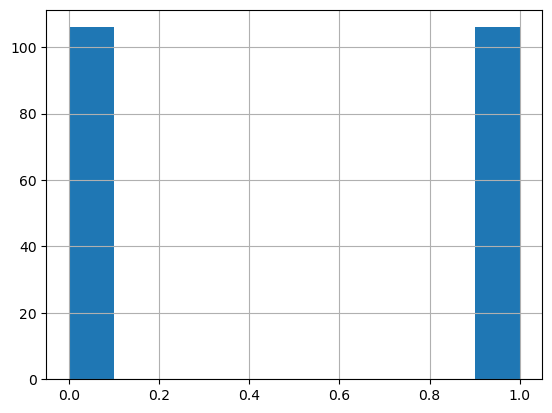

In [62]:
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X, y)
y_train.hist()

<Axes: >

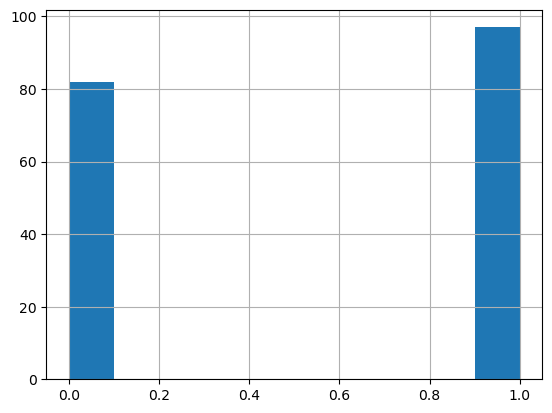

In [63]:
# PCA data
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape
X = X.dropna()

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=30)
y_train.hist()

<Axes: >

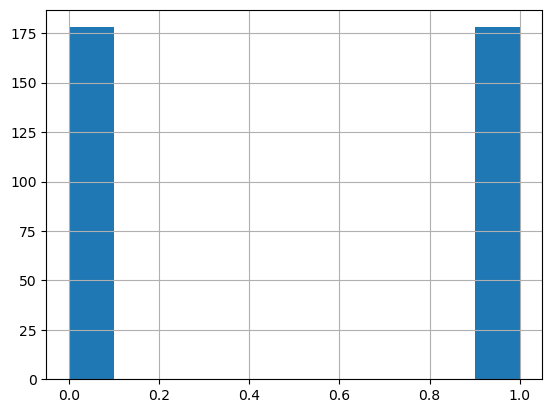

In [56]:
smote = SMOTE(random_state=0)
X_train_pca, y_train = smote.fit_resample(X_pca, y)
y_train.hist()

# SVM Values

In [57]:
svclassifier = SVC(kernel='linear',probability=True)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print('SVM accuracy:', svclassifier.score(X_test, y_test))
print('SVM classification report:\n', classification_report(y_test, y_pred))
y_scores = svclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Calculate AUC
roc_auc = auc(fpr, tpr)
print('SVM AUC value:', roc_auc)
newsvm=SVC(kernel='linear', probability=True)
newsvm.fit(X_train_pca, y_train)
y_pred = newsvm.predict(X_test_pca)
print('\nSVM accuracy for PCA:', newsvm.score(X_test_pca, y_test))
print('SVM classification report for PCA:\n', classification_report(y_test, y_pred))
y_scores = newsvm.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('SVM AUC value for PCA:', roc_auc)


SVM accuracy: 0.6071428571428571
SVM classification report:
               precision    recall  f1-score   support

           0       0.30      0.43      0.35         7
           1       0.78      0.67      0.72        21

    accuracy                           0.61        28
   macro avg       0.54      0.55      0.54        28
weighted avg       0.66      0.61      0.63        28

SVM AUC value: 0.5170068027210885

SVM accuracy for PCA: 0.5357142857142857
SVM classification report for PCA:
               precision    recall  f1-score   support

           0       0.31      0.71      0.43         7
           1       0.83      0.48      0.61        21

    accuracy                           0.54        28
   macro avg       0.57      0.60      0.52        28
weighted avg       0.70      0.54      0.56        28

SVM AUC value for PCA: 0.5714285714285714


# KNN Values

In [58]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('KNN accuracy:', knn.score(X_test, y_test))
y_pred = knn.predict(X_test)
print('KNN classification report:\n',classification_report(y_test, y_pred))
y_scores = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('KNN AUC value:', roc_auc)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_pca, y_train)
print('\nKNN accuracy for PCA:', knn.score(X_test_pca, y_test))
y_pred = knn.predict(X_test_pca)
print('KNN classification report for PCA\n', classification_report(y_test, y_pred))
y_scores = knn.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('KNN AUC value for PCA',roc_auc)

KNN accuracy: 0.42857142857142855
KNN classification report:
               precision    recall  f1-score   support

           0       0.26      0.71      0.38         7
           1       0.78      0.33      0.47        21

    accuracy                           0.43        28
   macro avg       0.52      0.52      0.43        28
weighted avg       0.65      0.43      0.45        28

KNN AUC value: 0.6224489795918368

KNN accuracy for PCA: 0.6071428571428571
KNN classification report for PCA
               precision    recall  f1-score   support

           0       0.39      1.00      0.56         7
           1       1.00      0.48      0.65        21

    accuracy                           0.61        28
   macro avg       0.69      0.74      0.60        28
weighted avg       0.85      0.61      0.62        28

KNN AUC value for PCA 0.9183673469387755


# Random Forest Values

In [48]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, y_train)
print('Random Forest accuracy:', model.score(X_test, y_test))
y_pred = model.predict(X_test)
print('Random Forest classification report\n',classification_report(y_test, y_pred))
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value:', roc_auc)
pmodel = RandomForestClassifier(n_estimators=40)
pmodel.fit(X_train_pca, y_train)
print('\nRandom Forest accuracy for PCA:', pmodel.score(X_test_pca, y_test))
y_pred = pmodel.predict(X_test_pca)
print('Random Forest classification report for PCA:\n',classification_report(y_test, y_pred))
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Random Forest AUC value for PCA:', roc_auc)

Random Forest accuracy: 0.5
Random Forest classification report
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.33      0.17      0.22         6

    accuracy                           0.50        14
   macro avg       0.44      0.46      0.43        14
weighted avg       0.45      0.50      0.46        14

Random Forest AUC value: 0.41666666666666663

Random Forest accuracy for PCA: 1.0
Random Forest classification report for PCA:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Random Forest AUC value for PCA: 1.0


In [130]:
rfc_search_space = {
    'n_estimators': range(10, 101),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 51),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 11),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


In [131]:
rfc = RandomForestClassifier()

In [132]:
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_search_space, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': range(2, 51), 'max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [133]:
best_params = random_search.best_params_
rfc = RandomForestClassifier(**best_params)

In [134]:
rfc.fit(X_train, y_train)


,n_estimators,36
,criterion,'gini'
,max_depth,2
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [135]:
y_pred = rfc.predict(X_test)


In [136]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.35


# Logistic Regression values

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Logistic Regression accuracy:', model.score(X_test, y_test))
y_pred = model.predict(X_test)
print('Logistic Regression classification report:\n',classification_report(y_test, y_pred))
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Logistic Regression AUC value:',roc_auc)
pmodel = LogisticRegression()
pmodel.fit(X_train_pca, y_train)
print('\nLogistic Regression accuracy for PCA:',pmodel.score(X_test_pca, y_test))
y_pred = pmodel.predict(X_test_pca)
print('Logistic Regression classification report for PCA:\n',classification_report(y_test, y_pred))
y_scores = pmodel.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('Logistic Regression AUC value for PCA',roc_auc)

Logistic Regression accuracy: 0.5
Logistic Regression classification report:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.33      0.17      0.22         6

    accuracy                           0.50        14
   macro avg       0.44      0.46      0.43        14
weighted avg       0.45      0.50      0.46        14

Logistic Regression AUC value: 0.35416666666666663

Logistic Regression accuracy for PCA: 0.42857142857142855
Logistic Regression classification report for PCA:
               precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.25      0.17      0.20         6

    accuracy                           0.43        14
   macro avg       0.38      0.40      0.38        14
weighted avg       0.39      0.43      0.40        14

Logistic Regression AUC value for PCA 0.4375


/home/novo/miniforge3/envs/smote/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGB Values

In [51]:
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = clf.predict(X_test)
print('XGB accuracy:',clf.score(X_test, y_test))
print('XGB Classification report:\n',classification_report(y_test, y_pred))
y_scores = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('XGB AUC value:',roc_auc)
pxgb = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
pxgb.fit(X_train_pca, y_train, eval_set=[(X_test_pca, y_test)])
print('\nXGB accuracy for PCA:', pxgb.score(X_test_pca, y_test))
y_pred = pxgb.predict(X_test_pca)
print('XGB classification report for PCA:\n',classification_report(y_test, y_pred))
y_scores = pxgb.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print('XBG AUC for PCA:', roc_auc)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0]	validation_0-logloss:0.71786
[1]	validation_0-logloss:0.77794
[2]	validation_0-logloss:0.85480
XGB accuracy: 0.42857142857142855
XGB Classification report:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         8
           1       0.00      0.00      0.00         6

    accuracy                           0.43        14
   macro avg       0.25      0.38      0.30        14
weighted avg       0.29      0.43      0.34        14

XGB AUC value: 0.5416666666666666
[0]	validation_0-logloss:0.62491
[1]	validation_0-logloss:0.54939
[2]	validation_0-logloss:0.53377
[3]	validation_0-logloss:0.46887
[4]	validation_0-logloss:0.40631
[5]	validation_0-logloss:0.33533
[6]	validation_0-logloss:0.30660
[7]	validation_0-logloss:0.27210
[8]	validation_0-logloss:0.24097
[9]	validation_0-logloss:0.22203
[10]	validation_0-logloss:0.20816
[11]	validation_0-logloss:0.18686
[12]	validation_0-logloss:0.16866
[13]	validation_0-logloss:0.15816
[14]	validat

# Elastic Net Values

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
print('Mean absolute error:',mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('r2 score:', r2_score(y_test, y_pred))
pcaX_train = scaler.fit_transform(X_train_pca)
pcaX_test = scaler.fit_transform(X_test_pca)
elastic_net = ElasticNet()
elastic_net.fit(pcaX_train, y_train)
y_pred = elastic_net.predict(pcaX_test)
print('\nMean absolute error for PCA:',mean_absolute_error(y_test, y_pred))
print('Mean squared error for PCA:', mean_squared_error(y_test, y_pred))
print('r2 score for PCA:', r2_score(y_test, y_pred))

Mean absolute error: 0.50139146567718
Mean squared error: 0.25376328217237304
r2 score: -0.01588242046129751

Mean absolute error for PCA: 0.50139146567718
Mean squared error for PCA: 0.25376328217237304
r2 score for PCA: -0.01588242046129751
